In [9]:
import matplotlib as plt
import pandas as pd
import pickle
import os

### Load scalability data

In [3]:
backup = os.getcwd() + '\\backup\\scalability.pkl'
print(backup)

with open(backup, 'rb') as file:
    scalability = pickle.load(file)
scalability

c:\Users\pierp\OneDrive\Desktop\Optimization Models\Python exercises\DSSC_MO\backup\scalability.pkl


[[100, 10, 3, 0, 31.35491770000226, 0.1],
 [100, 10, 3, 1, 34.46138219999921, 0.1],
 [100, 10, 3, 2, 31.391996199999994, 0.1],
 [100, 10, 3, 3, 30.62632189999931, 0.1],
 [100, 10, 3, 4, 28.71415689999776, 0.14],
 [100, 10, 3, 5, 30.069196200001898, 0.1],
 [100, 10, 3, 6, 29.46209700000327, 0.11],
 [100, 10, 3, 7, 29.228656299997965, 0.11],
 [100, 10, 3, 8, 30.55898370000068, 0.1],
 [100, 10, 3, 9, 30.629643399999622, 0.14],
 [100, 20, 6, 0, 97.50710619999882, 0.62],
 [100, 20, 6, 1, 98.00547690000167, 1.3],
 [100, 20, 6, 2, 99.08387130000119, 1.0],
 [100, 20, 6, 3, 98.63293780000095, 0.71],
 [100, 20, 6, 4, 103.03771659999984, 1.36],
 [100, 20, 6, 5, 98.54971789999763, 1.06],
 [100, 20, 6, 6, 96.90654129999893, 0.89],
 [100, 20, 6, 7, 97.60291769999822, 0.54],
 [100, 20, 6, 8, 97.61120279999886, 0.69],
 [100, 20, 6, 9, 96.65466979999837, 0.85],
 [100, 30, 9, 0, 209.82649669999955, 2.36],
 [100, 30, 9, 1, 220.89734690000114, 2.28],
 [100, 30, 9, 2, 208.15367289999995, 3.26],
 [100, 30, 

In [99]:
columns = ['fields', 'storages', 'vehicles', 'iter', 'build_time', 'opt_time']
df_scalability = pd.DataFrame(scalability, columns=columns)

Some iterations seem blocked or return an optimization runtime which is way far from the other iterations for the same set of [n. fields, n. storages, n. vehichels]; these runs are outiliers and they will not considered for the scalabiltiy analisys.

In [77]:
df_scalability = df_scalability.drop([30, 31]) # remove outliers

###  Group iterations 

group by: 'fields', 'storages' and 'vehicles' and compute mean and standard deviation

In [78]:
df = df_scalability.groupby(['fields', 'storages', 'vehicles'], group_keys=True).agg({'build_time':['mean','std'], 'opt_time':['mean', 'std']})
print(df)

                          build_time            opt_time          
                                mean        std     mean       std
fields storages vehicles                                          
100    10       3          30.649735   1.602065    0.110  0.016330
       20       6          98.359216   1.811175    0.902  0.278480
       30       9         212.423105  13.191471    3.167  1.234351
       40       12        366.481884  20.525518    8.422  3.293899


### Produce Visualization

##### Plot Buid runtime

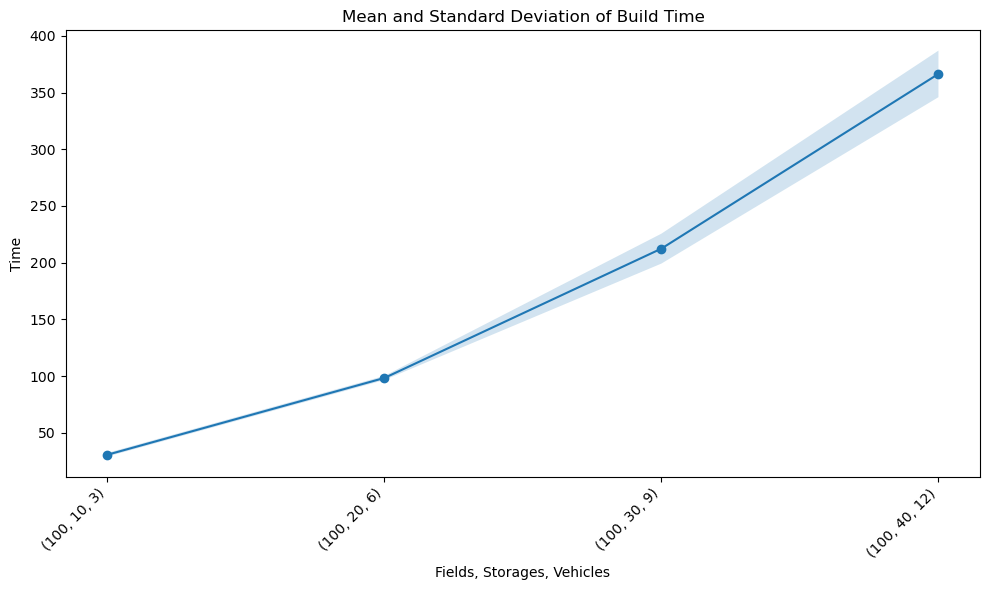

In [96]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot build_time
df['build_time']['mean'].plot(ax=ax, marker='o', label='build_time mean')
ax.fill_between(
    range(len(df)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Build Time')

plt.tight_layout()
plt.show()

##### Plot Optimiaziotion runtime

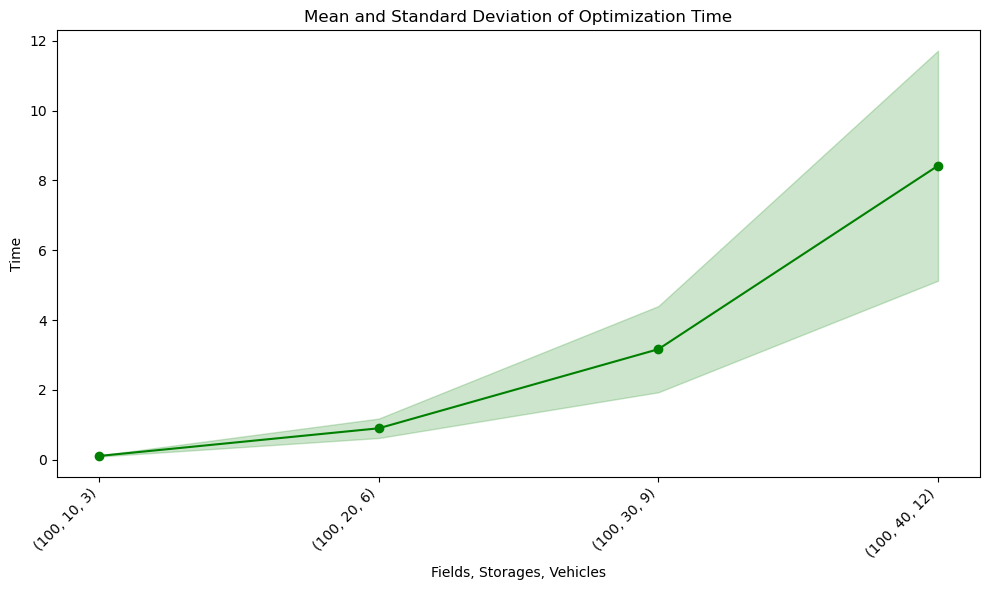

In [100]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax, marker='o', color='green')
ax.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Optimization Time')

plt.tight_layout()
plt.show()

##### Plot Total runtime (Build + Optimization)

In [81]:
# Group by the first level of the multi-index and sum
tot_time = {
 'mean_time': df.loc[:,'build_time']['mean'] + df.loc[:,'opt_time']['mean'],
 'std_time': df.loc[:,'build_time']['std'] + df.loc[:,'opt_time']['std']
}

tot_time = pd.DataFrame(tot_time)
print(tot_time) 

                           mean_time   std_time
fields storages vehicles                       
100    10       3          30.759735   1.618395
       20       6          99.261216   2.089655
       30       9         215.590105  14.425822
       40       12        374.903884  23.819416


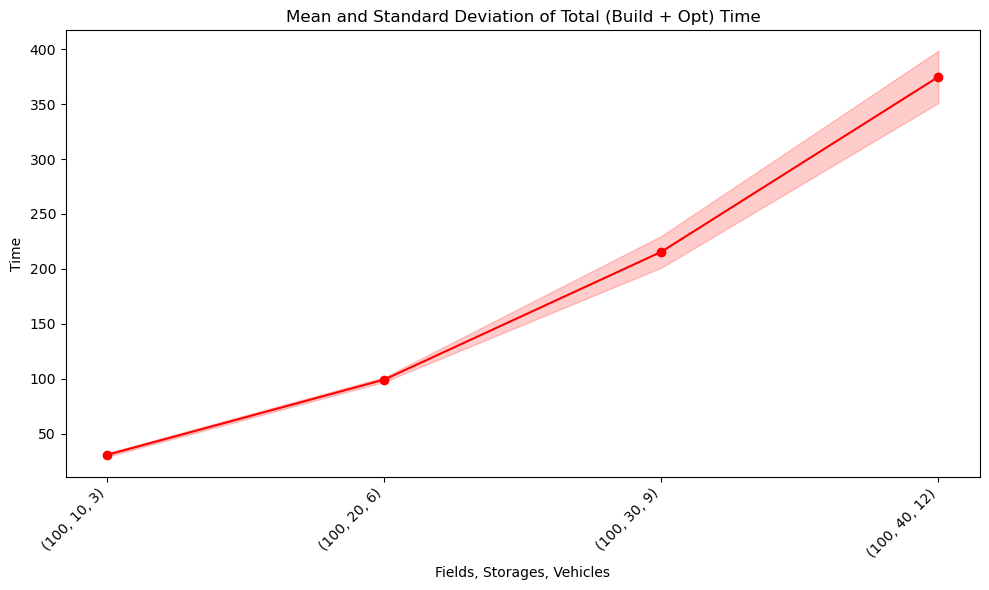

In [95]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tot_time
tot_time['mean_time'].plot(ax=ax, marker='o', color='red')
ax.fill_between(
    range(len(tot_time)),
    tot_time['mean_time'] - tot_time['std_time'],
    tot_time['mean_time'] + tot_time['std_time'],
    alpha=0.2,
    color='red'
)

# Customize the plot
ax.set_xticks(range(len(tot_time)))
ax.set_xticklabels(tot_time.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Total (Build + Opt) Time')

plt.tight_layout()
plt.show()

##### Plot Total runtime (Build + Optimization) & only Optimization runtime

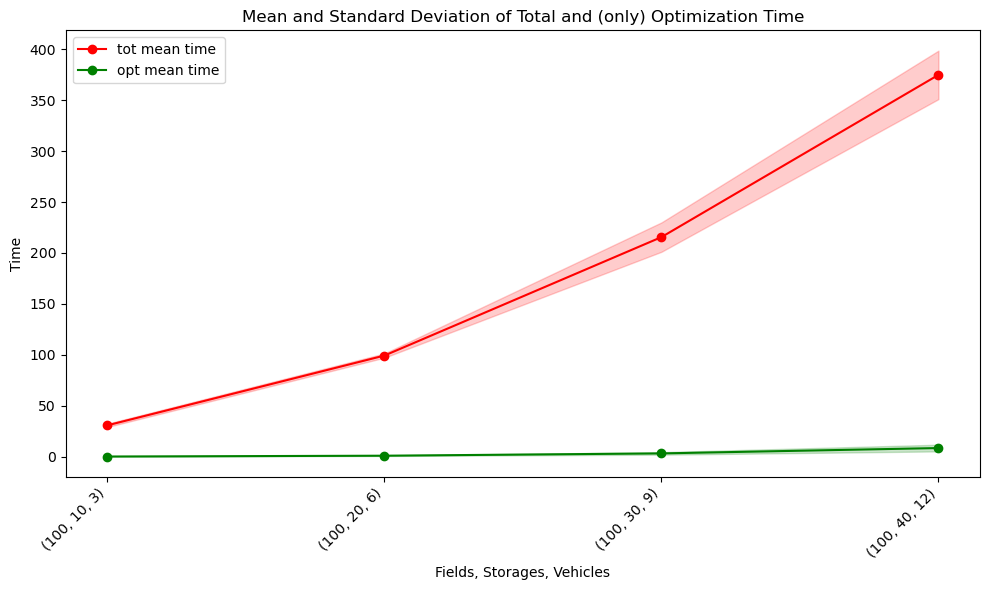

In [98]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tot_time
tot_time['mean_time'].plot(ax=ax, marker='o', label='tot mean time', color='red')
ax.fill_between(
    range(len(tot_time)),
    tot_time['mean_time'] - tot_time['std_time'],
    tot_time['mean_time'] + tot_time['std_time'],
    alpha=0.2,
    color='red'
)

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax, marker='o', label='opt mean time', color='green')
ax.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

# Customize the plot
ax.set_xticks(range(len(tot_time)))
ax.set_xticklabels(tot_time.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Total and (only) Optimization Time')
ax.legend()

plt.tight_layout()
plt.show()